In [ ]:
import sys
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
data_entrenamiento = 'G:/Mi unidad/Letras/train'
data_validacion = 'G:/Mi unidad/Letras/valid'

"""
Parameters
"""
epocas=15
longitud, altura = 256, 256
batch_size = 10
pasos = 10
validation_steps = 50
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 3
lr = 0.0004

In [ ]:
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,   
    shear_range=0.2,    
    zoom_range=0.2,     
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

print(entrenamiento_generador.class_indices)

Found 161 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
{'A': 0, 'C': 1, 'Z': 2}


In [ ]:
cnn = Sequential()
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
Total params: 9,152
Trainable params: 9,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))
cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=lr),
            metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 262144)            0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
cnn.fit(
    entrenamiento_generador,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=validacion_generador,
    validation_steps=validation_steps)

Epoch 1/15
10/10 [==============================] - 5s 461ms/step - loss: 5.5768 - accuracy: 0.4505 - val_loss: 2.8859 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 4s 367ms/step - loss: 3.3069 - accuracy: 0.4300
Epoch 3/15
10/10 [==============================] - 4s 351ms/step - loss: 1.5012 - accuracy: 0.5604
Epoch 4/15
10/10 [==============================] - 4s 346ms/step - loss: 1.4935 - accuracy: 0.5495
Epoch 5/15
10/10 [==============================] - 4s 345ms/step - loss: 1.2009 - accuracy: 0.5604
Epoch 6/15
10/10 [==============================] - 4s 361ms/step - loss: 0.9648 - accuracy: 0.5934
Epoch 7/15
10/10 [==============================] - 4s 342ms/step - loss: 0.9782 - accuracy: 0.6264
Epoch 8/15
10/10 [==============================] - 4s 338ms/step - loss: 0.8983 - accuracy: 0.6484
Epoch 9/15
10/10 [==============================] - 4s 344ms/step - loss: 0.5372 - accuracy: 0.8242
Epoch 10/15
10/10 [==============================] - 4s 38

In [ ]:
import numpy as np

In [ ]:
saved_keras_model = 'modeloRes.h5'
cnn.save(saved_keras_model)

In [ ]:
model_json = cnn.to_json()
with open("modeloRes.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
cnn.save_weights("modeloRes.h5")
print("Modelo Guardado!")

Modelo Guardado!


In [ ]:
import tensorflow as tf #tf 2.0.0

In [ ]:
json_file = open("C:/Users/Mackleyn/Downloads/tesis/modeloRes.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(
    loaded_model_json, custom_objects=None
)
loaded_model.load_weights("modeloRes.h5")

In [ ]:
import matplotlib.pyplot as plt
import PIL.Image as pilimg

loaded model and weights


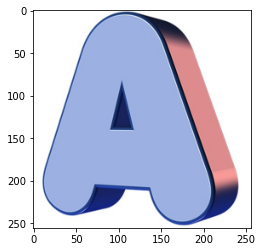

In [ ]:
print("loaded model and weights")

x = pilimg.open(r'C:/Users/Mackleyn/Documents/Untitled Folder/a.jpg')
x = x.resize((256,256))
plt.imshow(x)
plt.show()
x = np.array(x)
x = np.reshape(x, (1, 256, 256, 3))

In [ ]:
import cv2  # for image processing

In [ ]:
img = cv2.imread('C:/Users/Mackleyn/Documents/Untitled Folder/a.jpg')
img = cv2.resize(img,(256,256))     # resize image to match model's expected sizing
img = img.reshape(1,256,256,3) # return the image with shaping that TF wants.

In [ ]:
loaded_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
results = loaded_model.predict(x)
print(results)

1/1 [==============================] - 0s 72ms/step
[[1. 0. 0.]]
